In [31]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.base import clone
from sklearn.metrics import accuracy_score
import numpy as np
from scipy.stats import mode

In [2]:
X, y = make_moons(n_samples=10000, noise=0.4)

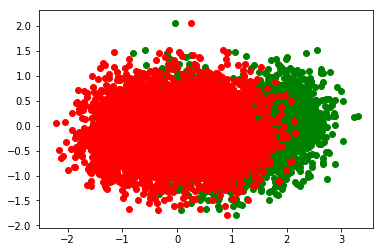

In [3]:
q = np.c_[X,y]
positive = q[np.where(q[:,2] == 1.)]
negative = q[np.where(q[:,2] == 0.)]
plt.scatter(positive[:,0], positive[:,1], color="green")
plt.scatter(negative[:,0], positive[:,1], color="red")

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
model = DecisionTreeClassifier(random_state=42)
parameters = {'max_leaf_nodes':[5,10,15,20,25,30,35,40,45,50], 'max_depth':[2,4,6,8,10, None], 'min_samples_split': [2,8,10,15,20,30,40]}
clf = GridSearchCV(model, parameters)

clf.fit(X_train, y_train)

/home/sam/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:734: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=None, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'min_samples_split': [2, 8, 10, 15, 20, 30, 40], 'max_leaf_nodes': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50], 'max_depth': [2, 4, 6, 8, 10, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [58]:
print(clf.score(X_test, y_test) *100)
clf.best_estimator_

85.55


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [27]:
ss = ShuffleSplit(n_splits=1000,test_size=len(X_train) -100, random_state=42)
datasets = []
for train_index, test_index in ss.split(X_train):
    X_set = X_train[train_index]
    y_set = y_train[train_index]
    datasets.append((X_set, y_set))

In [59]:
trees = [clone(clf.best_estimator_) for k in range(len(datasets))]
scores = []
for tree, (a,b) in zip(trees,datasets):
    tree.fit(a,b)
    predict = tree.predict(X_test)
    scores.append(accuracy_score(y_test, predict))
np.mean(scores)

0.822457

In [60]:
predictions = np.empty([1000, len(X_test)], dtype=np.uint8)

for index, tree in enumerate(trees):
    predictions[index] = tree.predict(X_test)
predictions

array([[1, 1, 0, ..., 1, 1, 0],
       [1, 1, 0, ..., 1, 1, 0],
       [1, 1, 0, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 1, 0],
       [1, 1, 0, ..., 1, 1, 0],
       [1, 1, 0, ..., 1, 1, 0]], dtype=uint8)

In [61]:
majority, h = mode(predictions, axis=0)

accuracy_score(y_test, majority.reshape((-1)))

0.8555